In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

In [26]:
def generate_random_points_in_circle(n, radius=1):
    """Generate n random points within a circle of given radius."""
    points = []
    for _ in range(n):
        theta = np.random.uniform(0, 2 * np.pi)
        r = radius * np.sqrt(np.random.uniform(0, 1))
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        points.append((x, y))
    return np.array(points)

def calculate_total_energy(points, k=1):
    """Calculate the total energy of a system of charges."""
    energy = 0
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distance = np.linalg.norm(points[i] - points[j])
            energy += k / distance
    return energy

def simulated_annealing_fixed(points, initial_temp, min_temp, alpha, radius, iter_num):
    """Simulated annealing algorithm to minimize the energy of the system, with fixed points within the circle."""
    current_temp = initial_temp
    current_points = points.copy()
    current_energy = calculate_total_energy(current_points)

    while current_temp > min_temp:
        for _ in range(iter_num):  # Number of iterations at each temperature
            for point in current_points:
                new_point = point + np.random.normal(0, current_temp)
                if np.linalg.norm(new_points) > radius:
                    new_point *= radius / np.linalg.norm(new_points[i])
                new_points = 
                new_energy = calculate_total_energy(new_points)
                energy_change = new_energy - current_energy

            # Accept new configuration if energy is lower or by a probability depending on the temperature
            if energy_change < 0 or np.exp(-energy_change / current_temp) > np.random.rand():
                current_points = new_points
                current_energy = new_energy

        current_temp *= alpha  # Decrease the temperature

    return current_points, current_energy

def optimal_configuration(N, R, initial_temp, min_temp, alpha, iter_num=100):
    # Generate initial random points
    initial_points = generate_random_points_in_circle(N, R)

    # Run simulated annealing with fixed points
    final_points, final_energy = simulated_annealing_fixed(initial_points, initial_temp, min_temp, alpha, R, iter_num)

    # Return the final points and energy
    return final_points, final_energy

In [46]:
a_s = [2,4,6,8]
for i, a in enumerate(a_s):
    a += 1
    a_s[i] = a
a_s

[2, 4, 6, 8]

In [41]:
N = 11
R = 1
T_max = 2000.
T_min = 0.001
alpha = 0.9
iter_num = 100
points, energy = optimal_configuration(N, R, T_max, T_min, alpha, iter_num)
print(f'Energy = {energy}')

Energy = 49.957436891492335


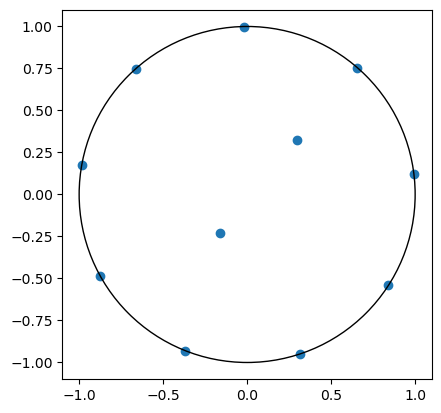

In [42]:
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])
ax.set_aspect('equal')
circle = Circle((0,0), R, fill=False)
ax.add_patch(circle)
plt.show()